In [65]:
import cv2
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt
import webp
from PIL import Image,ImageDraw,ImageFont

0.5555555555555556

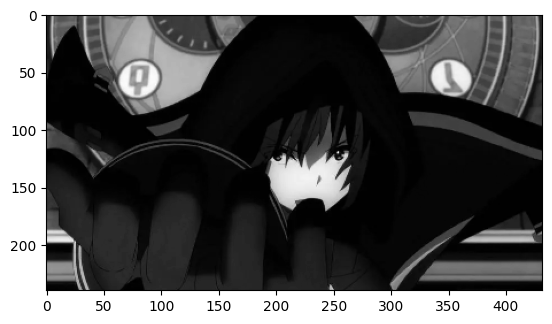

In [66]:
img = webp.imread('./data/shadow3.webp')
# img = cv2.imread('./data/shadow.jpg')

img = cv2.resize(img,(432,240))
# ratio = 0.5
# img = cv2.resize(img,(int(ratio*(len(img[0]))),int(ratio*(len(img)))))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='gray')
len(img)/len(img[0])

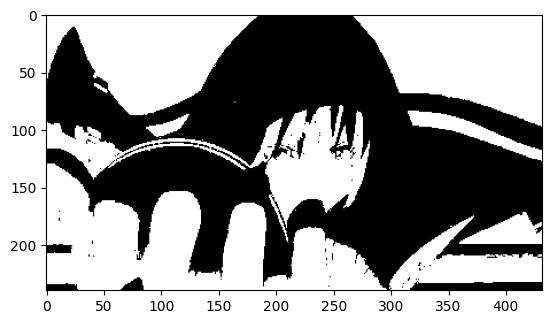

In [67]:
med_val = np.median(gray) 
(thresh, baw) = cv2.threshold(gray, med_val, 255, cv2.THRESH_BINARY)
plt.imshow(baw,cmap='gray')

In [68]:
# filt = cv2.GaussianBlur(gray,(5,5),0)
med_val = np.median(baw) 
lower = int(max(0 ,0.7*thresh))
upper = int(min(255,1.3*thresh))

432

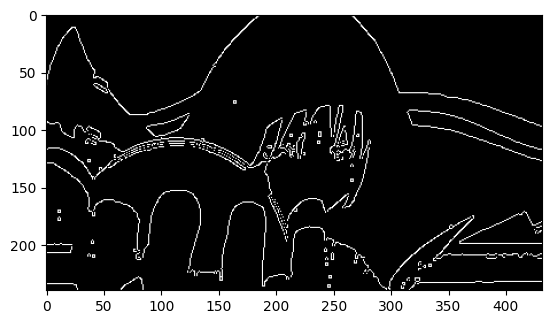

In [69]:
edge = cv2.Canny(baw,lower,upper)
plt.imshow(edge,cmap= 'gray')
df = pd.DataFrame(edge)
len(df.columns)

In [74]:
height =15
width =15
output = Image.new('L',(width*(len(df.columns)),height*(len(df))),color = (0))
d = ImageDraw.Draw(output)
fnt = ImageFont.truetype('./data/ARIBL0.ttf',15)

In [75]:
for i in range(len(df)+1):
    for j in range(len(df.columns)+1):
        if i<len(df) and j<len(df.columns) and edge[i][j] == 255:
            s = '@'
        else:
            s = '-'
        d.text((j*width,i*height),s,font = fnt,fill = (255))

In [76]:
output.save('output.jpg')
print(output.size)

(6480, 3600)
